# Python  project on Gapminder dataset

##  Introduction to dataset

Gapminder dataset explains about GDP per capita as a measure of average income per person in a country. This dataset contains information about population, life expectancy, and gdp percapita from 1952 till 2007 for each country. In this project we are going use python to get insights from dataset.

Variables used in this dataset are:

1: country = Country 

2: year = Data collected year

3: population = Population of each country

4: continent = Continent where country is located

5: life_exp = Life expectancy at birth

6: gdp_cap = GDP per capita


## Understanding of dataset


Before moving to any dataset, we must have to understand each variable properly. For example, in this dataset nearly all columns are self-explanatory, but gdp_cap may be confusing. In this project, we have two different datasets containing information about Gapminder. Both datasets have common keys. 

GDP stands for Gross Domestic Product. This measure National income / National Output and National expenditure.
GDP per capita divides the GDP by the population.

Rest of the columns are self-explanatory.


## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading gapminder files

Here Two dataset files of Gapminder

In [3]:
Gapmineder_dataset_1 = pd.read_excel("Gapminder_key_1.xlsx")
Gapmineder_dataset_1

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia
...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa
1700,Zimbabwe,1992,10704340,Africa
1701,Zimbabwe,1997,11404948,Africa
1702,Zimbabwe,2002,11926563,Africa


In [4]:
Gapmineder_dataset_2 = pd.read_excel("Gapminder_key_2.xlsx")
Gapmineder_dataset_2

,country,year,life_exp,gdp_cap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106
...,...,...,...,...
1699,Zimbabwe,1987,62.351,706.157306
1700,Zimbabwe,1992,60.377,693.420786
1701,Zimbabwe,1997,46.809,792.449960
1702,Zimbabwe,2002,39.989,672.038623


Merging of two Gapminder files on same variables country and year

In [5]:
Gapminder = Gapmineder_dataset_1.merge(Gapmineder_dataset_2, on=['country','year'], how = 'outer')
Gapminder

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [6]:
# get nuber of rows and columns in the dataset
Gapminder.shape

(1704, 6)

In [7]:
#  get  summary of the dataset
Gapminder.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


1. Country and continent are string data type, converting them into categorical data type using programming constructs.

In [8]:
# change of variables  to category data type
Gapminder = Gapminder.astype({"country":'category',"continent":'category'})
Gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


In [9]:
# change of variables  to category data type
for col in ['country','continent']:
    Gapminder[col] = Gapminder[col].astype('category')
Gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


2. Counting the number of countries in this dataset.

In [10]:
# using this we count 
Gapminder['country'].nunique

<bound method IndexOpsMixin.nunique of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: category
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']>

3. Country had the lowest life expectancy in 2007.

In [11]:
# for getting lwest life expectancy use of min() function
Gapminder_2007 = Gapminder[Gapminder['year']== 2007]
Gapminder_2007[Gapminder_2007.life_exp ==Gapminder_2007.life_exp.min()]

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


4. Country had the highest GDP per capita in 2007.

In [12]:
# use of max() function
Gapminder_2007[Gapminder_2007.gdp_cap ==Gapminder_2007.gdp_cap.max()]

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


5. Country had the highest GDP in 2007.

In [13]:
# use of max() function   we know that gdp =gdp_cap * population
Gapminder['gdp']=Gapminder.gdp_cap*Gapminder.population
Gapminder_2007 = Gapminder[Gapminder['year']== 2007]

Gapminder_2007[Gapminder_2007.gdp ==Gapminder_2007.gdp.max()]

,country,year,population,continent,life_exp,gdp_cap,gdp
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


6. To see change in the trend from 1952 to 2007 in life expectancy, plot the boxplot.


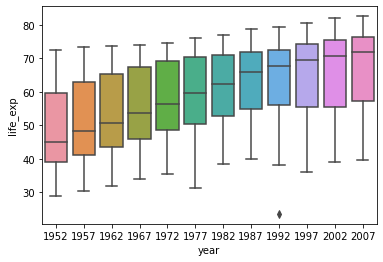

In [14]:
ax = sns.boxplot(x='year',y='life_exp',data=Gapminder)

7. Ploting the boxplot  for getting which Continent has the lowest life expectancy in 2007.

<AxesSubplot:xlabel='continent', ylabel='life_exp'>

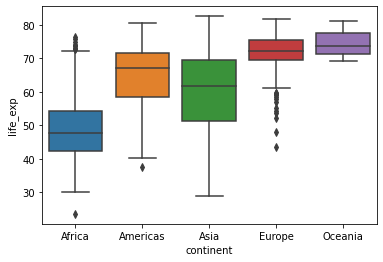

In [15]:
sns.boxplot(x="continent",y="life_exp",data=Gapminder)

8. Average life expectancy, GDP and gdp per capita in 2007.

In [16]:
Gapminder_2007.describe()

,year,population,life_exp,gdp_cap,gdp
count,142.0,1.420000e+02,142.000000,142.000000,1.420000e+02
mean,2007.0,4.402122e+07,67.007423,11680.071820,4.092207e+11
std,0.0,1.476214e+08,12.073021,12859.937337,1.311852e+12
min,2007.0,1.995790e+05,39.613000,277.551859,3.190141e+08
25%,2007.0,4.508034e+06,57.160250,1624.842248,1.743849e+10
50%,2007.0,1.051753e+07,71.935500,6124.371108,5.786906e+10
75%,2007.0,3.121004e+07,76.413250,18008.835640,2.759600e+11
max,2007.0,1.318683e+09,82.603000,49357.190170,1.293446e+13


9. Relationship between life expectancy and gdp per capita ,showing each data point by continent.


Text(0, 0.5, 'Life Expectancy [in years]')

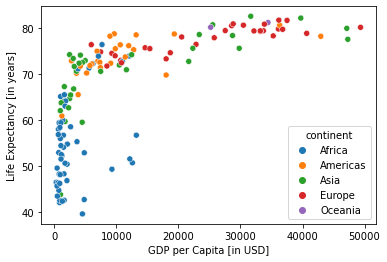

In [17]:
# scatter plot  life expectancy vs gdp per capita
sns.scatterplot(x="gdp_cap",
               y="life_exp",
               hue = "continent",
               data =Gapminder_2007 )
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')

10. The relationship  between life expectancy and gdp percapita using log.

Text(0, 0.5, 'Life Expectancy [in years]')

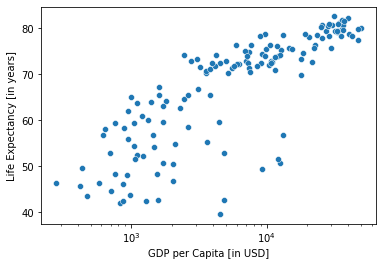

In [18]:
# Scatter plot gdp_cap vs life expectancy
sns.scatterplot(x="gdp_cap",
               y="life_exp",
               data=Gapminder_2007)
plt.xscale('log') # converting x scale into log
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')

11. Trend of life expectancy in India from 1952 - 2007.

<AxesSubplot:xlabel='year', ylabel='life_exp'>

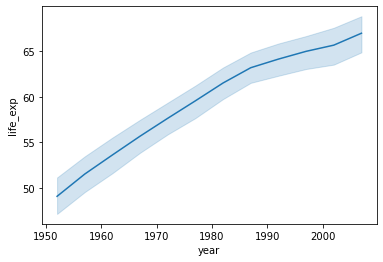

In [19]:
sns.lineplot(data=Gapminder, x='year',y='life_exp')

12. The trend of GDP per capita in India from 1952 - 2007.

<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

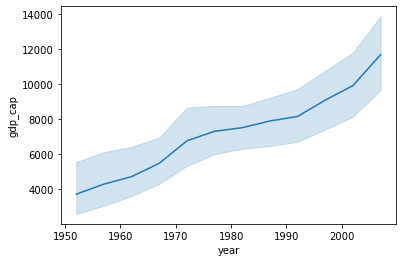

In [20]:
sns.lineplot(data=Gapminder, x='year',y='gdp_cap')

13. The median age of each continent by year.

In [21]:
Gapminder_gb_year_cont =Gapminder.groupby(['year','continent'])['life_exp'].median()
Gapminder_gb_year_cont

year  continent
1952  Africa       38.8330
      Americas     54.7450
      Asia         44.8690
      Europe       65.9000
      Oceania      69.2550
1957  Africa       40.5925
      Americas     56.0740
      Asia         48.2840
      Europe       67.6500
      Oceania      70.2950
1962  Africa       42.6305
      Americas     58.2990
      Asia         49.3250
      Europe       69.5250
      Oceania      71.0850
1967  Africa       44.6985
      Americas     60.5230
      Asia         53.6550
      Europe       70.6100
      Oceania      71.3100
1972  Africa       47.0315
      Americas     63.4410
      Asia         56.9500
      Europe       70.8850
      Oceania      71.9100
1977  Africa       49.2725
      Americas     66.3530
      Asia         60.7650
      Europe       72.3350
      Oceania      72.8550
1982  Africa       50.7560
      Americas     67.4050
      Asia         63.7390
      Europe       73.4900
      Oceania      74.2900
1987  Africa       51.6395
      Americ